<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li>

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Описание данных

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

## Изучение данных из файла

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t') # прочитаем файл с архивными данными по продаже квартир
data.head(50)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [ ]:
data.info() # изучим общую информацию об архивных данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
data.isna().sum() # изучение датасета на предмет пропущенных значений

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Вывод

  Общая инфорация о данных показывает наличие пропусков в следующих столбцах:
  - ceiling_height;
  *floors_total;
  *living_area ;
  *is_apartment;
  *kitchen_area;
  *balcony;
  *locality_name;
  *airports_nearest;
  *cityCenters_nearest;
  *parks_around3000;
  *parks_nearest;
  *ponds_around3000;
  *ponds_nearest;
  *days_exposition. 
  
  Такие данные, как: число балконов, число водоёмов в радиусе 3 км, число парков в радиусе 3 км можем сразу заменить на нулевые значения, поскольку пропуски в данных случаях скорее всего говорят об отсутствии объектов в характеристиках недвижимости. Пропущенные значения в столбце is_apartment заменим на False, скорее всего объект недвижимости не является аппартаментами, иначе это было бы отмечено. Тип данных в столбцах balcony, floors_total, parks_around3000, ponds_around3000, days_exposition надо привести к целочисленным значениям,т.к. число этажей, количество объектов или дней нахождения объявления в публикации не может быть дробным.
  Отсутствующие данные по высоте потолков, жилой площади, площади кухни, удаленности от центра города и дням размещения объявления на сайте заменим медианными значениями.
  Отсутствующие данные по общему количеству этажей заполним данными по этажу, на котором находится квартира.

## Предобработка данных

In [ ]:
data['balcony'] = data['balcony'].fillna(0).astype('int') # заполнение пропусков в колонках и изменение типа значений на целочисленные
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int') #заполнение пропусков в колонках и изменение типа значений на целочисленные
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')  #заполнение пропусков в колонках и изменение типа значений на целочисленные
data.loc[data['floors_total'].isna() == True, 'floors_total'] = data['floor'] # заполнение пропусков в столбце floors_total на значения из столбца floor
data['floors_total'] = data['floors_total'].astype('int') # изменение типа данныйх в столбце floors_total на int
data['is_apartment'] = data['is_apartment'].fillna(False) # изменение пропуцщенных значений на False
data.loc[data['ceiling_height'].isna() == True, 'ceiling_height'] = data['ceiling_height'].median() #замена пустых значений в столбце ceiling_height на медианные
data.loc[data['living_area'].isna() == True, 'living_area'] = data['living_area'].median() #замена пустых значений в столбце living_area на медианные
data.loc[data['kitchen_area'].isna() == True, 'kitchen_area'] = data['kitchen_area'].median() #замена пустых значений в столбце kitchen_area на медианные
data.loc[data['cityCenters_nearest'].isna() == True, 'cityCenters_nearest'] = data['cityCenters_nearest'].median() #замена пустых значений в столбце cityCenters_nearest на медианные
data.info() # вывод измененного датафрейма на экран

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   


Дополнительно проверим пропуски в столбце days_exposition.
    

In [ ]:
data.loc[data['days_exposition'].isnull()==True,['first_day_exposition','days_exposition']].head(20) # выведем на экран 
# строки датасета с пропущенными значениями по столбцу `days_exposition`

,first_day_exposition,days_exposition
0,2019-03-07T00:00:00,NaN
7,2019-04-18T00:00:00,NaN
44,2018-11-18T00:00:00,NaN
45,2018-12-02T00:00:00,NaN
46,2019-01-31T00:00:00,NaN
49,2018-11-22T00:00:00,NaN
52,2017-09-22T00:00:00,NaN
71,2019-03-27T00:00:00,NaN
81,2018-12-27T00:00:00,NaN
84,2019-03-13T00:00:00,NaN



Большинство пропущенных значений приходится на последний год выборки -2019. Похоже, что значения в этом столбце были пропущены из-за того, что неизвестно когда была совершена сделка. Т.е. факт сделки состоялся, но на онлайн-ресурсе она не была закрыта. В таком случае пропущенные значения лучше не заполнять, т.к. это может исказить итоговые данные. Тем не менее оставшиеся данные нужно привести к типу `int`

    

In [ ]:
data[data['days_exposition'].notnull()]['days_exposition'].astype('int')

1         81
2        558
3        424
4        121
5         55
        ... 
23691    519
23692    413
23693    239
23695     45
23697    602
Name: days_exposition, Length: 20518, dtype: int64


Поменяем типы столбцов last_price, parks_nearest, ponds_nearest, airports_nearest на int, заполним пропущенные значения parks_nearest, ponds_nearest нулями.


In [ ]:
data['last_price'] = data['last_price'].astype(int)
data['airports_nearest'] = data[data['airports_nearest'].notnull()]['airports_nearest'].astype(int)
data['ponds_nearest'] = data['ponds_nearest'].fillna(0).astype('int')
data['parks_nearest'] = data['parks_nearest'].fillna(0).astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  int64  
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})#приведем стиль названия стоолбца в соответствие с остальными столбцами
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482,2,755,NaN
1,7,3350000,40.40,2018-12-04T00:00:00,1,2.65,11,18.6,1,False,...,11.00,2,посёлок Шушары,12817.0,18603.0,0,0,0,0,81.0
2,10,5196000,56.00,2015-08-20T00:00:00,2,2.65,5,34.3,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90,2,574,558.0
3,0,64900000,159.00,2015-07-24T00:00:00,3,2.65,14,30.0,9,False,...,9.10,0,Санкт-Петербург,28098.0,6800.0,2,84,3,234,424.0
4,2,10000000,100.00,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112,1,48,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21T00:00:00,3,3.70,5,73.3,3,False,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796,3,381,NaN
23695,14,3100000,59.00,2018-01-15T00:00:00,3,2.65,5,38.0,4,False,...,8.50,0,Тосно,NaN,13098.5,0,0,0,0,45.0
23696,18,2500000,56.70,2018-02-11T00:00:00,2,2.65,3,29.7,1,False,...,9.10,0,село Рождествено,NaN,13098.5,0,0,0,0,NaN
23697,13,11475000,76.75,2017-03-28T00:00:00,2,3.00,17,30.0,12,False,...,23.30,2,Санкт-Петербург,39140.0,10364.0,2,173,3,196,602.0


Проверим DataFrame на наличие дубликатов в столбце locality_name

In [ ]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Вывод уникальных данных из столбца locality_name показал наличие неявных дубликатов, связанных с различиями в наименовании населенного пункта, например: поселок Мурино и посёлок Мурино и т.д. От данных дубликатов постараемся избавиться, при помощи функции удаления слов, начинающихся на прописную букву. Функцию будем применять к элементам столбца датафрейма методом apply()

In [ ]:
def lower_word_removal(locality_name): # объявляем новую функцию
    splitted = str(locality_name).split() # создаем список из строки, получаемой в качестве аргумента функции
    result  = [] # объявляем новый список
    for i in splitted: # пройдемся циклом по списку
        if i.istitle() == True: #если слово начинается с заглавной буквы, то добавляем его в список result
            result.append(i)
    subject = ' '.join(result) # создаем итоговую строку 
    return subject
data['locality_name'] = data['locality_name'].apply(lower_word_removal) #применяем новую функцию к каждой строке столбца locality_name
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482,2,755,NaN
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.65,11,18.6,1,False,...,11.0,2,Шушары,12817.0,18603.0,0,0,0,0,81.0
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.65,5,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90,2,574,558.0
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.65,14,30.0,9,False,...,9.1,0,Санкт-Петербург,28098.0,6800.0,2,84,3,234,424.0
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112,1,48,121.0


Данные в столбце locality_name заменены, это пригодится нам для арешения задачи о 10 населенных рунктах с наибольшим числом объявлений.

## Расчёты и добавление результатов в таблицу

Подсчет и добавление в таблицу цены квадратного метра.

In [ ]:
data['per_square_meter_cost'] = (data['last_price']/data['total_area']).round() #расчет цены за квадратный метр и округдение результата до 2ух знаков после запятой
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,per_square_meter_cost
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1,482,2,755,NaN,120370.0
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.65,11,18.6,1,False,...,2,Шушары,12817.0,18603.0,0,0,0,0,81.0,82921.0
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.65,5,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1,90,2,574,558.0,92786.0
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.65,14,30.0,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2,84,3,234,424.0,408176.0
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2,112,1,48,121.0,100000.0


Переведем значения столбца `first_day_exposition` в более удобную форму с указанием дня недели, месяца и года публикации объявления, полученные данные разместим в новом столбце `exposition_date`, день недели поместим в отдельный столбец `dow`, год и месяц размещения также выведем в отдельные столбцы, они понадобятся нам для дальнейшего анализа влияния различных показателей на стоимость квартиры.

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m' )
data['dow'] = data['first_day_exposition'].dt.weekday # создание столбца с информацией по дням недели
data['year'] = data['first_day_exposition'].dt.year # создание столбца с информацией по годам
data['month'] = data['first_day_exposition'].dt.month # создание столбца с информацией по месяцам
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,per_square_meter_cost,dow,year,month
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1,482,2,755,NaN,120370.0,3,2019,3
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,18603.0,0,0,0,0,81.0,82921.0,1,2018,12
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,13933.0,1,90,2,574,558.0,92786.0,3,2015,8
3,0,64900000,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,6800.0,2,84,3,234,424.0,408176.0,4,2015,7
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2,112,1,48,121.0,100000.0,1,2018,6


Поделим на категории этаж расположения квартиры: первый, последний, другой. Данные добавим в столбец `floor_category`. Для решения задачи напишем функцию одной строки и применим её к датафрейму методом `apply`

In [ ]:
def floor_categorization (row): #объявленние новой функци
    item_floor = row['floor']# присвоение значения столбца floor новой переменной
    tot_floor = row['floors_total']# присвоение значения столбца floors_total новой переменной
    if   item_floor == 1:
        return 'первый этаж'
    if item_floor == tot_floor:
        return 'последний этаж'
    return 'другой этаж'
data['floor_category'] = data.apply(floor_categorization,axis=1) # применение функции к строке датафрейма
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,per_square_meter_cost,dow,year,month,floor_category
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1,482,2,755,NaN,120370.0,3,2019,3,другой этаж
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,0,0,0,81.0,82921.0,1,2018,12,первый этаж
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,1,90,2,574,558.0,92786.0,3,2015,8,другой этаж
3,0,64900000,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,2,84,3,234,424.0,408176.0,4,2015,7,другой этаж
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2,112,1,48,121.0,100000.0,1,2018,6,другой этаж


Для последующего анализа нам понадобятся столбцы: соотношение жилой и общей площади, а также отношение площади кухни к общей. Добавим их в таблицу, написав следующий код.

In [ ]:
data['living_vs_total_area'] = (data['living_area']/data['total_area']).round(2) # доля жилой площади в общей площади
data['kitchen_vs_total_area'] = (data['kitchen_area']/data['total_area']).round(2) #доля площади кухни в общей площадии
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,per_square_meter_cost,dow,year,month,floor_category,living_vs_total_area,kitchen_vs_total_area
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755,NaN,120370.0,3,2019,3,другой этаж,0.47,0.23
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,0,81.0,82921.0,1,2018,12,первый этаж,0.46,0.27
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2,574,558.0,92786.0,3,2015,8,другой этаж,0.61,0.15
3,0,64900000,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,3,234,424.0,408176.0,4,2015,7,другой этаж,0.19,0.06
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48,121.0,100000.0,1,2018,6,другой этаж,0.32,0.41


## Исследовательский анализ данных

Для изучения  параметров: площадь, цена, число комнат, высота потолков, построим гистограммы для каждого параметра.

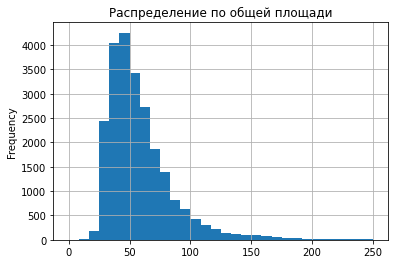

In [ ]:
data['total_area'].plot(kind = 'hist', range = (0,250), bins=30, grid=True).set_title('Распределение по общей площади'); # построение графика распределения общей площади по объявлениям50, title = 'total_area') #построен


Как видно из полученной гистограммы, наибольшее количествро предложений имеют полощадь от 30 до 60 квадратных метров, с пиком в районе 50 кв. м.

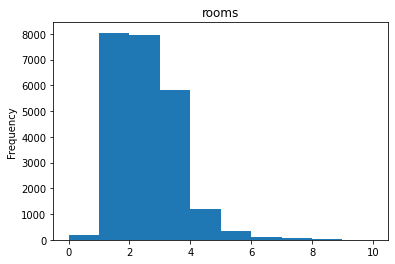

In [ ]:
data['rooms'].plot(kind = 'hist', range = (0,10),bins=10, title = 'rooms'); # построение гистограммы распределения квартир по количеству комнат среди объявлений

Гистограмма по количеству комнат отображает наибольшее количество предложений по 1-3 комнатным квартирам.

<div class = "alert alert-info" style="border-left: 7px solid blue">
Ниже добавим гистограммы для анализа цены и высоты потолков (last_price, ceiling_height)
</div>

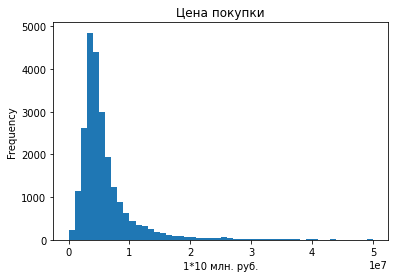

In [ ]:
data['last_price'].plot(kind = 'hist',range=(0,50000000), bins=50, title = 'Цена покупки').set_xlabel('1*10 млн. руб.');

<div class = "alert alert-info" style="border-left: 7px solid blue">
График показывает, что средняя цена продажи квартиры составила 5 млн. рублей.
</div>

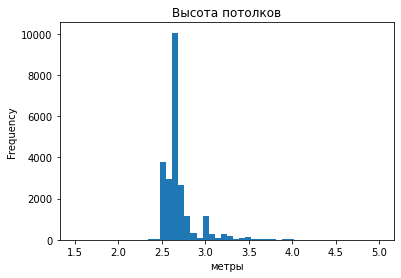

In [ ]:
data['ceiling_height'].plot(kind = 'hist',range=(1.5,5), bins=50, title = 'Высота потолков').set_xlabel('метры');

<div class = "alert alert-info" style="border-left: 7px solid blue">
Большинство квартир в выборке имеют высоту потолков 2.5 метра.
</div>

Изучим время продажи квартиры. Для этого построим гистограмму. Посчитаем среднее и медиану. Опишем, сколько обычно занимает продажа. Определим, когда можно считать, что продажи прошли очень быстро, а когда необычно долго.

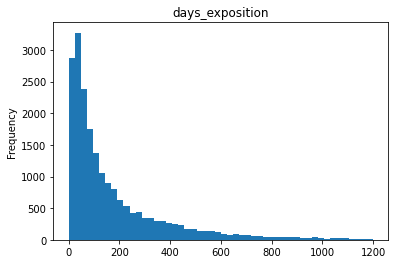

In [ ]:
data['days_exposition'].plot(kind = 'hist',range=(0,1200), bins=50, title = 'days_exposition');

Найдем значение медианы и среднего для столбца 'days_exposition`, применив метод describe к датафрейму.

In [ ]:
data['days_exposition'].describe() 

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Как видно из полученной гистограммы, большинство объявлений висят на сайте от 45 до  232 дней с медианным значением в 95 дней и средним значением  180 дней, что свидетельствует о больших отклонениях в большую сторону и подтверждается большой величиной стандартного отклонения  219 дней.
Для дальнейшего анализа лучше ограничить диапазон рассмотрения. Для того, чтобы понять до какой величины лучше сделать ограничение, построим диаграмму "ящик с усами"

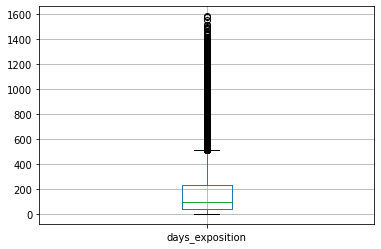

In [ ]:
data.boxplot(column = 'days_exposition');

Диаграмма подтверждает большое число выбросов за пределами 500 дней, для дальнейшего анализа ограничимся рассмотрением диапазона от 0 до 500 дней. Продажи дольше 500 дней являются необычно долгими и являются явно нехарактерными.  Возможной причиной таких случаев может быть то, что владельцы объявления забывают снять его с размещения после продажи квартиры.Ячейки с пустыми значениями уберем из рассмотрения, также как и ячейки с длительностью размещения 0 дней, такие объявления могли быть размещены по ошибке.
Построим новую гистограмму на основании полученных сокращенных данных.

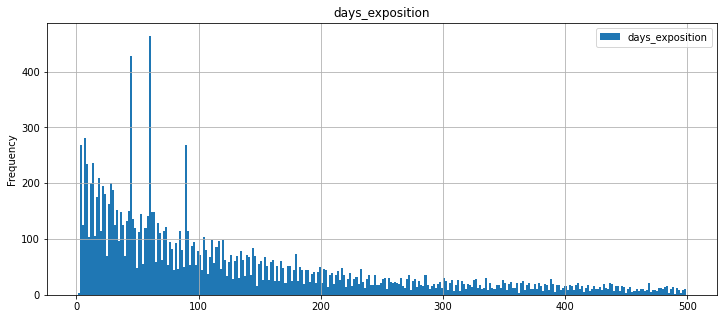

In [ ]:
data.query('1<=days_exposition<500').dropna().plot(y= 'days_exposition',kind = 'hist',grid=True, bins=300, title = 'days_exposition',figsize=(12,5));


In [ ]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

На полученном графике и из описания данных в столбце видно, что в среднем объявления висят на сайте 169 дней,но на такую длительность могут влиять выбросы значений, как например, в периоде размещения 95 дней, когда на графике заметен большой скачок объявлений.  Без учета таких выбросов объявления находятся на сайте 95 дней. Быстрой можно считать продажу квартир в срок до 45 дней, если же квартира продается больше 200 дней, то такой срок продажи можно считать долгим. Посмотрим, сколько объявлений провисели на сайте 95 дней.

<div class = "alert alert-info" style="border-left: 7px solid blue">
После  удаления лишних заполнений в колонке days_exposition, появились дополнительные выбросы, посмотрим поближе в какие периоды они встречаются.
</div>

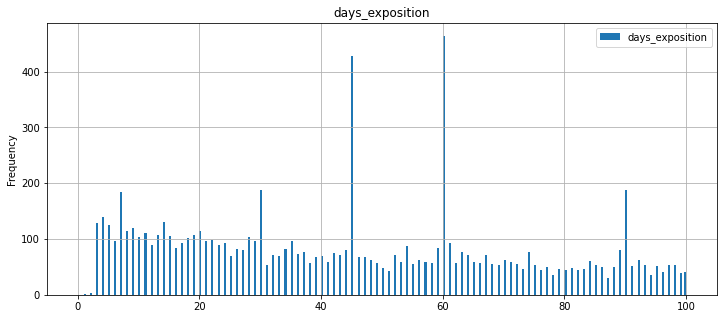

In [ ]:
data.query('1<=days_exposition<500').dropna().plot(y= 'days_exposition',kind = 'hist',range =(0,100), grid=True, bins=300, title = 'days_exposition',figsize=(12,5));


<div class = "alert alert-info" style="border-left: 7px solid blue">
Выбросы возникают в определенные периоды - 30,45,60 и 95 дней. Предположительно в эти дни происходит автоматическое снятие объвлений с размещения, в случае отказа от их продления.
</div>

In [ ]:
data.query('days_exposition == 95')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,per_square_meter_cost,dow,year,month,floor_category,living_vs_total_area,kitchen_vs_total_area
533,15,5900000,67.4,2019-01-11,3,2.50,9,48.5,8,False,...,0,0,95.0,87537.0,4,2019,1,другой этаж,0.72,0.09
902,7,2600000,61.2,2016-03-29,4,2.50,5,49.0,4,False,...,0,0,95.0,42484.0,1,2016,3,другой этаж,0.80,0.08
1041,9,4450000,82.0,2018-06-18,3,2.65,10,43.0,1,False,...,0,0,95.0,54268.0,0,2018,6,первый этаж,0.52,0.17
1716,15,6650000,63.8,2017-04-20,2,2.65,4,39.9,4,False,...,1,582,95.0,104232.0,3,2017,4,последний этаж,0.63,0.10
1830,20,11250000,95.0,2018-06-21,3,2.70,24,50.0,17,False,...,0,0,95.0,118421.0,3,2018,6,другой этаж,0.53,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22335,13,7600000,64.0,2018-02-10,2,2.80,15,33.2,3,False,...,1,405,95.0,118750.0,5,2018,2,другой этаж,0.52,0.19
22517,31,9000000,82.6,2018-02-22,3,3.00,5,52.7,5,False,...,1,691,95.0,108959.0,3,2018,2,последний этаж,0.64,0.11
22809,16,4700000,44.0,2016-04-16,1,2.65,10,20.0,5,False,...,0,0,95.0,106818.0,5,2016,4,другой этаж,0.45,0.27
22908,20,5250000,39.8,2018-07-11,1,2.65,17,18.1,3,False,...,1,283,95.0,131910.0,2,2018,7,другой этаж,0.45,0.22


14% объявлений (3246/23699) провисели на сайте 95 дней. по всей видимости - это срок размещения объявления на сайте, после этого периода времени объявление удаляется, если нет подтверждения о его продлении.
<div class = "alert alert-info" style="border-left: 7px solid blue">
После удаления лишних заполнений доля объявлений, рповисевших 95 дней стала значительно ниже - всего лишь 64 позиции.
</div>

<div class = "alert alert-info" style="border-left: 7px solid blue">
Проверю наличие выбросов в колонках last_price, ceiling_height и total_area. Проверку выбросов произведем при помощи построения диаграммы "ящик с усами"
</div>

(0.0, 20000000.0)

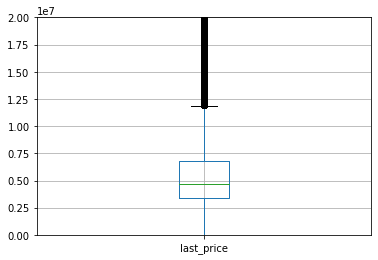

In [ ]:
data.boxplot(column = 'last_price') # диаграмма распределения для стоимости квартир
plt.ylim(0, 20000000) #ограничим интервал рассмотрения до 20 млн. рублей

<div class = "alert alert-info" style="border-left: 7px solid blue">
Средняя стоимость квартиры - 5 млн. рублей, выбросами можем считать предложения со стоимостью выше 12 млн. рублей. Такие значения удалим из дальнейшего рассмотрения. Перед уданением проверим сколько таких выбросов в процентном соотношении к общему объему датасета.
    </div>

In [ ]:
len(data.query('last_price>12000000'))/len(data)*100

8.190218996582134

<div class = "alert alert-info" style="border-left: 7px solid blue">
Таких данных меньше 10%, можно удалить их из дальнейшего рассмотрения.
    </div>

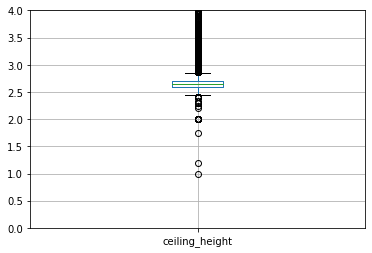

In [ ]:
data.boxplot(column = 'ceiling_height'); # диаграмма распределения для высоты потолков
plt.ylim(0,4); #ограничим интервал рассмотрения до 4 метров

<div class = "alert alert-info" style="border-left: 7px solid blue">
Значения меньше 2-ух метров и больше 2.8 м исходя из диаграммы являются выбросами, будем удалять их из таблицы для дальнейшего анализа. Перед уданением проверим сколько таких выбросов в процентном соотношении к общему объему датасета.
    </div>

In [ ]:
len(data.query('2<ceiling_height<2.8'))/len(data)*100 

82.7756445419638

<div class = "alert alert-info" style="border-left: 7px solid blue">
Таких данных меньше 10%, можно удалить их из дальнейшего рассмотрения.
    </div>

(0.0, 250.0)

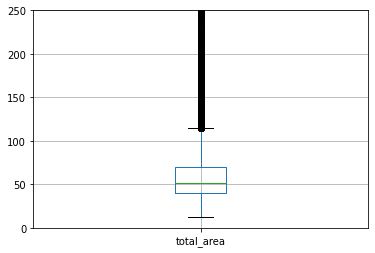

In [ ]:
data.boxplot(column = 'total_area');# диаграмма распределения для общей площади квартиры
plt.ylim(0, 250) #ограничим интервал рассмотрения до 250 кв. метров

<div class = "alert alert-info" style="border-left: 7px solid blue">
Диаграмма распределения по общим площадям квартир отражает много выбросов в диапазоне свыше 120 кв.м, их будем удалять из рассмотрения. Перед удалением проверим сколько таких выбросов в процентном соотношении к общему объему датасета.
    </div>

In [ ]:
len(data.query('30<total_area>120'))/len(data)*100 

4.481201738469977

<div class = "alert alert-info" style="border-left: 7px solid blue">
Таких данных меньше 10%, можно удалить их из дальнейшего рассмотрения.
    </div>

In [ ]:
data_new = data[['last_price','rooms','total_area','ceiling_height', 'city_centers_nearest','floor_category','dow','month','year']]
data_new = data.query(('last_price<12000000') and ('2<ceiling_height<2.8') and ('30<total_area<120')) #удалим выбросы, выявленные при построении диаграмм
data_new

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,per_square_meter_cost,dow,year,month,floor_category,living_vs_total_area,kitchen_vs_total_area
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,2,755,NaN,120370.0,3,2019,3,другой этаж,0.47,0.23
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.6,1,False,...,0,0,81.0,82921.0,1,2018,12,первый этаж,0.46,0.27
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.3,4,False,...,2,574,558.0,92786.0,3,2015,8,другой этаж,0.61,0.15
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,1,48,121.0,100000.0,1,2018,6,другой этаж,0.32,0.41
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.4,5,False,...,0,0,55.0,95066.0,0,2018,9,другой этаж,0.47,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000,62.40,2016-08-05,3,2.60,9,40.0,8,False,...,1,675,239.0,73718.0,4,2016,8,другой этаж,0.64,0.13
23695,14,3100000,59.00,2018-01-15,3,2.65,5,38.0,4,False,...,0,0,45.0,52542.0,0,2018,1,другой этаж,0.64,0.14
23696,18,2500000,56.70,2018-02-11,2,2.65,3,29.7,1,False,...,0,0,NaN,44092.0,6,2018,2,первый этаж,0.52,0.16
23697,13,11475000,76.75,2017-03-28,2,3.00,17,30.0,12,False,...,3,196,602.0,149511.0,1,2017,3,другой этаж,0.39,0.30


Рассмотрим какие факторы больше всего влияют на стоимость квартиры. Для этого изучим, зависит ли цена от площади, числа комнат, удалённости от центра. Определим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.
Для наглядного изучения влияния нескольких факторов на стоимость квартиры применим матрицу диаграмм рассеивания. Для этого создадим датафрейм со следующими столбцами: 
  * стоимость квартиры;
  * число комнат;
  * площадь квартиры;
  * удаленность от центра;
  * категория этажа;
  * день недели размещения объявления;
  * месяц размещения объявления;
  * год размещения объявления.

In [ ]:
data_new = data[['last_price','rooms','total_area','city_centers_nearest','floor_category','dow','month','year']]

Посмотрим как влияет площадь квартиры на её стоимость, для этого построим диаграмму рассеяния.

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

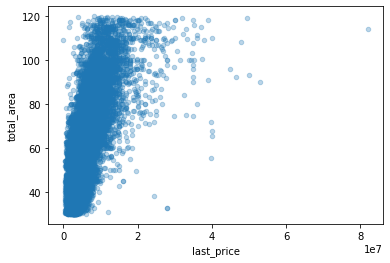

In [ ]:
data_new.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3)

График отражает наличие прямой зависимости между стоимостью и площадью. При помощи коэффициента корреляции проверим насколько сильной является данная зависимость.

In [ ]:
data_new['last_price'].corr(data_new['total_area'])

0.6830703737779551

Величина коэффициента корреляции показывает наличие умеренного влияния площади квартиры на её стоимость.

Следующим фактором влияния рассмотрим количество комнат.

<AxesSubplot:xlabel='last_price', ylabel='rooms'>

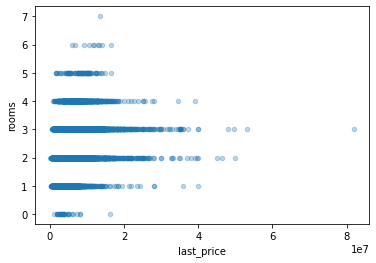

In [ ]:
data_new.plot(x='last_price', y='rooms', kind='scatter', alpha=0.3)

На диаграмме видно, что число комнат не сильно влияет на стоимость квартиры - они могут иметь одинаковую стоимость независимо от количества комнат. Скорее всего есть более весомые факторы влияния. Подсчитаем коэффициент корреляции для того, чтобы в этом убедиться.


In [ ]:
data_new['last_price'].corr(data_new['rooms'])

0.37124424568161607

Коэффициент корреляции подтверждает наличие несильной зависимости стоимости квартиры от количества комнат.

Удаленность от центра также наверняка влияет на стоимость квартиры, проверим какова величина и характер этого влияния.

<AxesSubplot:xlabel='last_price', ylabel='city_centers_nearest'>

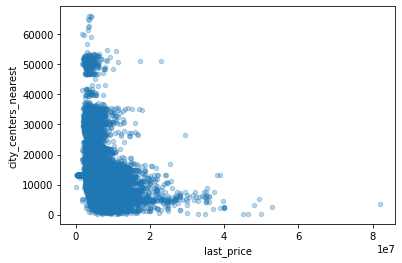

In [ ]:
data_new.plot(x='last_price', y='city_centers_nearest', kind='scatter', alpha=0.3)

Если зависимость и есть, то она не слишком большая, для проверки рассчитаем коэффициент корреляции.

In [ ]:
data_new['last_price'].corr(data_new['city_centers_nearest'])

-0.2726790491952218

Так и есть - зависимость не совсем большая и к тому же она обратная. Это логисно, поскольку чем больше расстояние от центра, тем меньше цена квартиры.

Проверим, есть ли разница в стоимости в зависимости от категории этажа, на котром располагается квартира.

<AxesSubplot:xlabel='floor_category'>

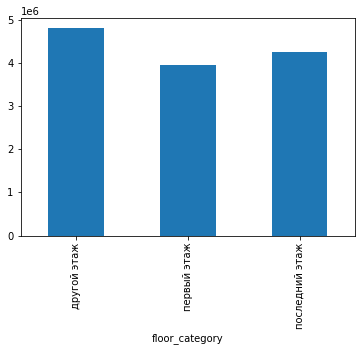

In [ ]:
data_new.groupby('floor_category')['last_price'].median().plot.bar() 

Диаграмма показывает, что самые дешевые квартиры располагаются на первом этаже, последний этаж также является фактором для снижения стоимости недвижимости, но несколько меньшим. Самые же дорогие квартиры располагаются между первым и последним этажами - в категории "другие"

Перейдем к анализу влияния периода подачи объявления на стоимость квартиры.

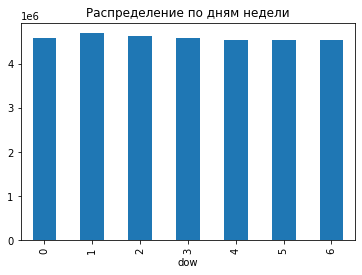

In [ ]:
# data_new.query('last_price < 50000000').plot(x='last_price', y='dow', kind='scatter', figsize=(9,9),alpha=1, grid = True); #график зависимости от дня недели
# data_new.query('last_price < 50000000').plot(x='last_price', y='month', kind='scatter', figsize=(9,9),alpha=1, grid = True); # график зависисмости от месяца
# data_new.query('last_price < 50000000').plot(x='last_price', y='year',  kind='scatter', figsize=(9,9),alpha=1, grid = True); # график зависимости от года
data_new.groupby('dow')['last_price'].median().plot.bar().set_title('Распределение по дням недели');

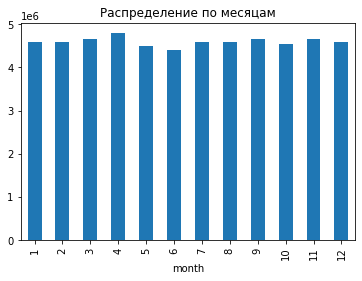

In [ ]:
data_new.groupby('month')['last_price'].median().plot.bar().set_title('Распределение по месяцам'); # график по новой схеме

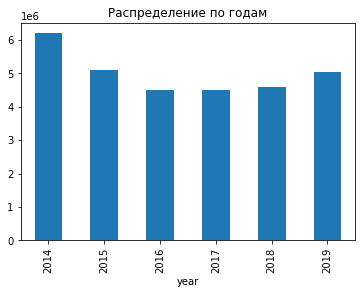

In [ ]:
data_new.groupby('year')['last_price'].median().plot.bar().set_title('Распределение по годам'); # график по новой схеме

* Распределение цен по дням недели показывает, что дороже всего квартиры выставляются по  вторникам. 
* Разброс цен по месяцам не такой явный, но можно заметить, что самые дешевые квартиры выставляются в  июне, а самые дорогие в апреле.
* Распределение цен по годам показывает максимальные показатели стоимости в  2014 году, в 2016 году цены были минимальными и затем снова начали расти.

Следующим шагом определим  10 населённых пунктов с наибольшим числом объявлений и посчитаем среднюю цену квадратного метра в этих населённых пунктах. В результате исследования выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья.

In [ ]:
top_ten = (
    data.pivot_table(index='locality_name', values = 'last_price', aggfunc='count') 
    .sort_values(by='last_price',ascending = False)[0:10] # определяем населенные пункты с наибольшим числом объявлений
)
top_ten['sqm_avg'] = data.pivot_table(index='locality_name', values = 'per_square_meter_cost',aggfunc = 'median') #добавляем столбец с данными по средней стоимости квадратного метра
top_ten.sort_values(by='sqm_avg', ascending = False) #сортируем данные по убыванию стоимости квадратного метра


,last_price,sqm_avg
locality_name,,
Санкт-Петербург,15721,104762.0
Пушкин,369,100000.0
Кудрово,472,95675.5
Парголово,327,91643.0
Мурино,590,86175.5
Шушары,440,76876.0
Колпино,338,74723.5
Гатчина,307,67797.0
Всеволожск,398,65789.0


<AxesSubplot:xlabel='locality_name'>

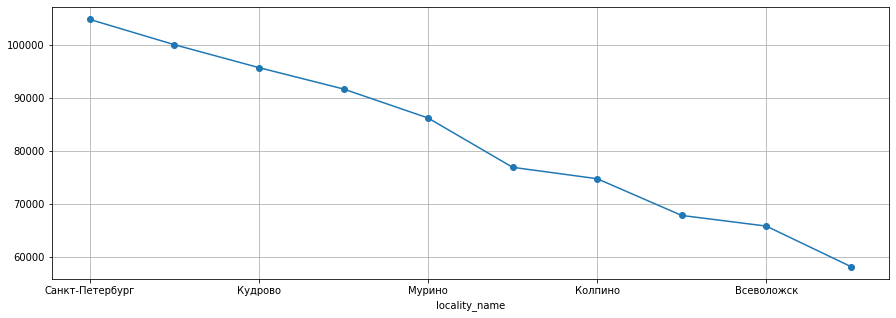

In [ ]:
top_ten.sort_values(by='sqm_avg', ascending = False)['sqm_avg'].plot(grid=True,style='o-',figsize=(15,5)) #покажем на графике стоимость квадратного метра в зависимости от населенного пункта

Как видно из приведенной таблицы и графика к ней, самые дорогие квартиры продаются в Санкт-Петербурге и Пушкине, самые дешевые в Выборге.

Следующим шагом изучим предложения квартир с привязкой к  информации о расстоянии до центра. Для рассмотрения будем использовать квартиры в Санкт-Петербурге. В результате исследования выясним, какая область входит в центр. Для решения задачи создадим столбец с расстоянием до центра в километрах, значения округлим до целых чисел. После этого посчитаем среднюю цену для каждого километра. Построим график, который будет показывать как цена зависит от удалённости до центра. Определим границу, где график сильно меняется, — это и будет центральная зона.

<AxesSubplot:xlabel='city_centers_nearest'>

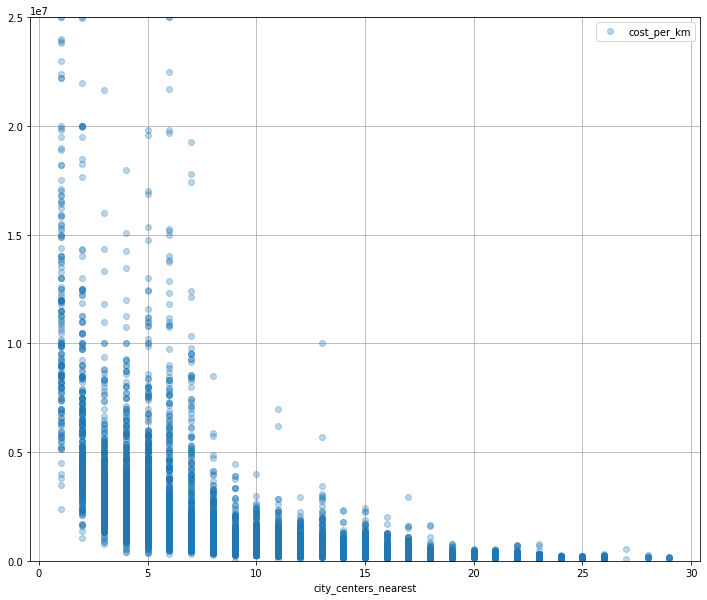

In [ ]:
spb_data = (
    data.query('locality_name == "Санкт-Петербург"')
    .loc[:,('locality_name','city_centers_nearest','last_price')]
)# создадим новый датафрейм с данными по удаленности от центра города и стоимости квартир в Санкт-Петербурге
spb_data['city_centers_nearest'] = (spb_data['city_centers_nearest']/1000).round() # пересчитаем удаленность от центра города в километрах
spb_data['cost_per_km'] = (spb_data['last_price']/spb_data['city_centers_nearest']).round() #подсчитаем среднюю стоимость квартиры для каждого километра
spb_data.plot(x='city_centers_nearest', y='cost_per_km',ylim=(0,25000000),grid = True,style = 'o', figsize=(12,10),alpha=0.3) #построим график зависимости цены от удаленности от центра 

Как видно на графике, наибольшие цены на квартиры находятся в пределах 1-7 км от центра города, далее стоимость падает практически наполовину. Границей центральной зоны Санкт-Петербурга будем считать расстояние в 7 км от центра города.

Изучим сегмент квартир в центре. Для этого проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).  Определим отличаются ли они от общих выводов по всей базе.

In [ ]:
spb_data_new =( #создадим датафрейм по квартирам, проданным в Санкт-Петербурге с данными по общей площади, цене, количеству комнат
    data.query('locality_name == "Санкт-Петербург"') # дню недели, месяцу и году размещения объявления
    .loc[:,('total_area','floor_category','last_price','rooms','ceiling_height','dow','month','year')]
)
spb_data_new['city_centers_nearest'] = (data['city_centers_nearest']/1000).round()
spb_central = spb_data_new.query('0<=city_centers_nearest<=7') #сделаем срез по квартирам, находящимся на расстоянии от 0 до 7 км от центра города
spb_central

,total_area,floor_category,last_price,rooms,ceiling_height,dow,month,year,city_centers_nearest
3,159.00,другой этаж,64900000,3,2.65,4,7,2015,7.0
24,97.20,первый этаж,6500000,2,2.65,5,10,2015,2.0
35,149.00,другой этаж,15500000,5,2.65,0,6,2017,4.0
51,161.00,другой этаж,45000000,3,3.20,1,10,2017,7.0
52,136.00,последний этаж,11795000,6,3.00,4,9,2017,7.0
...,...,...,...,...,...,...,...,...,...
23665,47.00,первый этаж,4250000,1,2.65,4,5,2016,5.0
23681,43.00,другой этаж,5250000,2,2.50,4,5,2018,7.0
23690,52.00,другой этаж,5500000,2,2.65,3,7,2018,6.0
23691,72.90,другой этаж,9470000,2,2.75,3,10,2016,4.0


In [ ]:
spb_central.describe()

,total_area,last_price,rooms,ceiling_height,dow,month,year,city_centers_nearest
count,3525.000000,3.525000e+03,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000
mean,93.168641,1.489553e+07,2.834326,2.953898,2.514043,6.427518,2017.171064,4.499858
std,59.473561,2.432091e+07,1.449808,0.736863,1.719105,3.453384,1.125225,1.688014
min,12.000000,1.600000e+06,0.000000,2.400000,0.000000,1.000000,2014.000000,0.000000
25%,57.000000,6.690000e+06,2.000000,2.650000,1.000000,3.000000,2017.000000,4.000000
50%,78.700000,9.200000e+06,3.000000,2.800000,3.000000,6.000000,2017.000000,5.000000
75%,110.000000,1.450000e+07,3.000000,3.150000,4.000000,10.000000,2018.000000,6.000000
max,631.200000,7.630000e+08,19.000000,32.000000,6.000000,12.000000,2019.000000,7.000000


Из описания датафрейма видно, что "медианная" квартира в центре имеет следующие характеристики: 3-х комнатная квартира с общей площадью 78 кв.м и выстой потолка 2,8 м по цене 5 млн. руб. в 5 км от центра города. Посмотрим как разные факторы влияют на стоимость квартир в центре.

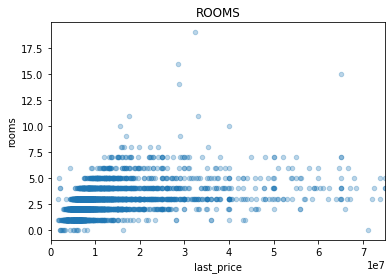

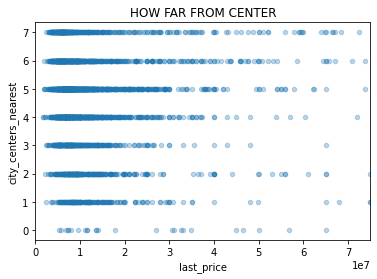

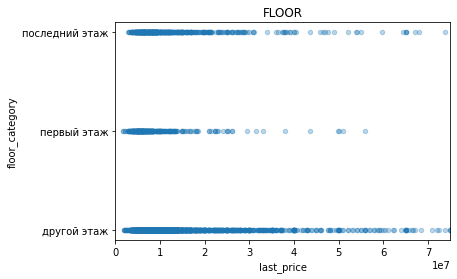

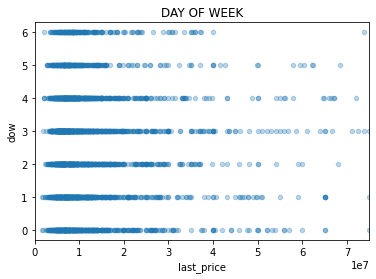

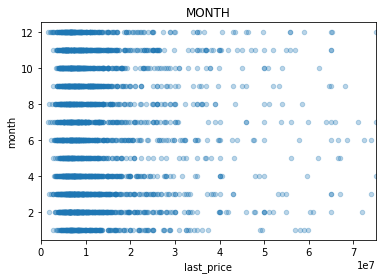

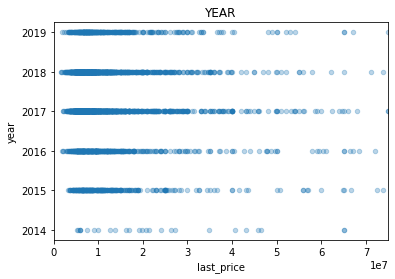

In [ ]:
spb_central.plot(x='last_price', xlim=(0,75000000), y='rooms',kind='scatter', alpha=0.3, title = 'ROOMS');
spb_central.plot(x='last_price',xlim=(0,75000000), y='city_centers_nearest', kind='scatter', alpha=0.3, title = 'HOW FAR FROM CENTER');
spb_central.plot(x='last_price',xlim=(0,75000000), y='floor_category', kind='scatter', alpha=0.3, title = 'FLOOR');
spb_central.plot(x='last_price',xlim=(0,75000000), y='dow', kind='scatter', alpha=0.3, title = 'DAY OF WEEK');
spb_central.plot(x='last_price',xlim=(0,75000000), y='month', kind='scatter', alpha=0.3, title = 'MONTH');
spb_central.plot(x='last_price',xlim=(0,75000000), y='year', kind='scatter', alpha=0.3, title = 'YEAR');


Ниже построим дополнительные бар-плоты.


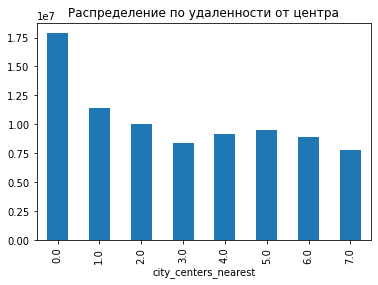

In [ ]:

spb_central.groupby('city_centers_nearest')['last_price'].median().plot.bar().set_title('Распределение по удаленности от центра');

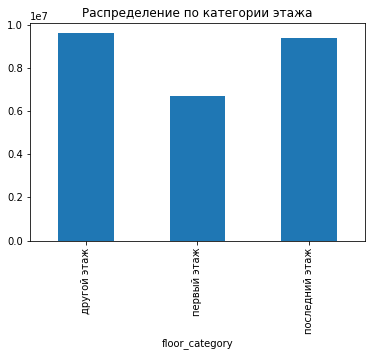

In [ ]:
spb_central.groupby('floor_category')['last_price'].median().plot.bar().set_title('Распределение по категории этажа');


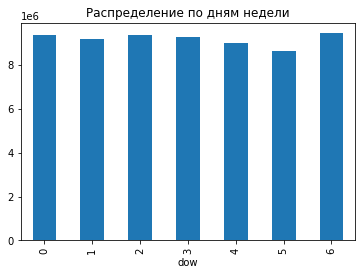

In [ ]:
spb_central.groupby('dow')['last_price'].median().plot.bar().set_title('Распределение по дням недели');


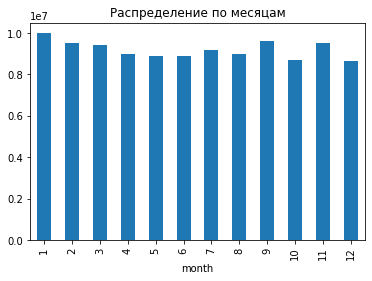

In [ ]:
spb_central.groupby('month')['last_price'].median().plot.bar().set_title('Распределение по месяцам');


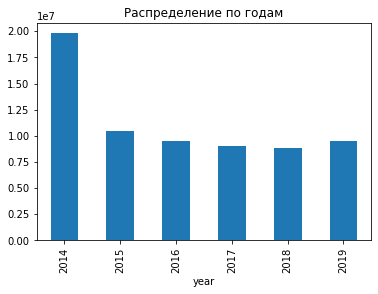

In [ ]:
spb_central.groupby('year')['last_price'].median().plot.bar().set_title('Распределение по годам');

Диаграммы по общему датафрейму и по выборке квартир из центра города очень похожи и показывают наличие следующих связей между показателями:
 - чем больше площадь квартиры, тем больше её цена;
 - самые дешевые квартиры на первом этаже, на последнем этаже они немного подороже, самые дорогие квартиры находятся между первым и последним этажами;
 - наибольшие цены на квартиры наблюдаются на расстоянии  0 - 2 км от центра города;
 - самые дорогие квартиры выставляются по  воскресеньям;
 - распределение объявлений по месяцам показывает, что самые дорогие квартиры появляются в объявлениях в  январе, сентябре и ноябре;
 - в  2014 году были самые высокие цены на квартиры, с 2015 по 2018 год наблюдается снижение стоимости, в 2019 году снова повышение сцен.

## Общий вывод

В ходе исследования была рассмотрена выборка объявлений, размещенных в период 2014 - 2019 годов.
Было обнаружено, что большинство выставляемых квартир имеют общую площадь от 30 до 60 квадратных метров, имеют 1-3 комнаты. С даты размещения объявления на сайте до даты его удаления проходит в среднем 95 дней. Продажу квартиры можно считать быстрой, если её покупают в срок до 45 дней с даты размещения объявления и наоборот долгой, если объявление размещено на сайте больше 200 дней. Цена квартиры имеет небольшую зависимость от количества комнат в ней (коэффициент корреляции 0,36), а влияние площади квартиры почти в 2 раза больше сказывается на конечной цене продажи ( корреляция 0,64). Удаленность от центра также имеет влияние на стоимость квартиры, но она несколько ниже, чем 2 предыдущих фактора (-0,19) - чем дальше квартира от центра города, тем она дешевле. Самую дешевую квартиру можно купить на первом этаже, квартиры на последнем этаже немного подороже, а самые дорогие квартиры располагаются между первым и последним этажами. Цена продажи зависит от времени следующим ообразом: 
 * самые дорогие квартиры выставляются по четвергам, а в выходные дни можно поймать предложение подешевле;
 * в марте и ноябре квартиры стоят дороже, а в мае и августе цена в объявлениях снижается;
 * за рассмотренный период 2014 - 2019 гг. самые дорогие квартиры продавались в 2017 году, а в 2018 - 2019 годах наблюдается некоторый спад в цене.
 
Больше всего квартир, судя по количеству объявлений, продается в Санкт-Петербурге и в Пушкине, а минимальное количество объявлений в Выборге. 
Самые дорогие квартиры ожидаемо находятся в центре Санкт-Петербурга. За центр города, исходя из распределения цен по расстоянию, стоит принимать объекты на расстоянии от 0 до 7 км от центра города. 


In [ ]:
data_new.describe() # для того, чтобы сделать выводы по типичной квартире выведем на экран распределение по таблице 
# data_new, содержащей данные первоначального датасета, 
# из которого удалены выбросы и заполнены недостающие значения.

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,per_square_meter_cost,dow,year,month,living_vs_total_area,kitchen_vs_total_area
count,21702.000000,2.170200e+04,21702.000000,21702.000000,21702.000000,21702.000000,21702.000000,21702.000000,21702.000000,21702.000000,...,21702.000000,21702.000000,21702.000000,18896.000000,21702.000000,21702.000000,21702.000000,21702.000000,21702.000000,21702.000000
mean,9.858677,5.480042e+06,55.903845,2.005529,2.707419,10.752097,31.756635,5.902037,9.983337,0.602110,...,163.579762,0.566538,196.343563,177.642358,96064.440651,2.571975,2017.378168,6.399088,0.564266,0.188454
std,5.628883,3.545103e+06,19.514692,0.892171,0.766446,6.602697,13.202023,4.886999,4.320608,0.960614,...,306.550332,0.863619,305.286810,215.452592,38297.913463,1.792096,1.030823,3.493485,0.112617,0.071124
min,0.000000,1.219000e+04,30.100000,0.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,112.000000,0.000000,2014.000000,1.000000,0.040000,0.040000
25%,6.000000,3.500000e+06,41.000000,1.000000,2.600000,5.000000,19.600000,2.000000,7.300000,0.000000,...,0.000000,0.000000,0.000000,45.000000,75582.000000,1.000000,2017.000000,3.000000,0.490000,0.140000
50%,9.000000,4.600000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,...,0.000000,0.000000,0.000000,94.000000,93824.000000,3.000000,2017.000000,6.000000,0.570000,0.170000
75%,14.000000,6.497750e+06,67.000000,3.000000,2.700000,16.000000,40.000000,8.000000,11.000000,1.000000,...,285.000000,1.000000,378.750000,227.000000,112307.250000,4.000000,2018.000000,10.000000,0.640000,0.230000
max,50.000000,8.200000e+07,119.800000,7.000000,32.000000,60.000000,101.000000,33.000000,64.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,848485.000000,6.000000,2019.000000,12.000000,1.000000,0.790000


<div class = "alert alert-info" style="border-left: 7px solid blue">
    
Типичная квартира, выставляемая в объявлении на ресурсе Яндекс-недвижимость имеет следующие характеристики:
  
   * общая площадь около 50 квадратных метров, из котрой жилая 30 метров и кухня около 9 метров;
   * количество комнат - от одной до трёх;
   * стоимость около 4,6 млн. рублей;
   * средняя высота потолка около 2,60 метра.
 </div>